In [1]:
from __future__ import print_function
import numpy as np # Biblioteca de funciones matematicas de alto nivel
np.random.seed(1337)  # for reproducibility
import tensorflow as tf
import keras
import pandas

Using TensorFlow backend.


In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential # necesario para poder generar la red neuronal
from keras.layers import Dense, Dropout, Activation, Lambda # Tipos de capa, hacen lo siguiente:
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten, LSTM
from keras.callbacks import CSVLogger # para guardar los datos en un excel
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

### ESTAS SON LAS CAPAS MAS IMPORTANTES
* **Dense**: La capa que mas se utiliza, de la siguiente manera ::  output = activation(dot(input, kernel)+bias) dot representa la operacion punto a punto de todos los inputs y sus correspondientes pesos
* **Dropout**: Se usa para resolver el problema de over-fitting, se intenta eliminar el ruido en esta capa
* **Activation**: capa de activacion
* **Lambda**: sirve para transformar los datos de entrada usando una expresión o una función
* **Embedding**: esta capa sirve para convertir a vectores de tamaño fijo
* **Convolution1D**: capa donde se realiza la convolucion
* **MaxPooling1D**: capa donde se realiza la operacion de pooling
* **Flatten**: capa donde se realiza la operacion de flatten (se puede usar para poner los datos en 1 sola dimension)

In [3]:
from keras.datasets import imdb # un dataset incluido en keras
from keras import backend as K # importas el backend (Tensorflow, Theano, etc)
import pandas as pd # pandas es una libreria extension de numpy usada para manipulacion y analisis de datos, para manipular tablas numericas y series temporales

In [4]:
from keras.utils.np_utils import to_categorical # sirve para convertir vectores de enteros a una matriz de clases binaria, por ejemplo:

 a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
 
                     [1, 0, 0, 0]
                     [0, 1, 0, 0]
                     [0, 0, 1, 0]
                     [0, 0, 0, 1]

In [5]:
import h5py # para almacenar un monton de datos numericos y dar facilidades de manipulacion para datos de Numpy

In [6]:
from sklearn.preprocessing import Normalizer # Para normalizar los datos
from sklearn.model_selection import train_test_split #para hacer la separacion entre datos de test y train
from sklearn.preprocessing import OneHotEncoder #para convertir los datos de entrada

In [7]:
dataset = pd.read_csv('dataset/All/All_notsorted.csv') # lectura de datos

D:\Program Files\anaconda3\envs\NN\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
dataset.shape #comprobamos el tamaño

(6187104, 80)

In [9]:
#Eliminamos los datos mal introducidos
dataset = dataset.drop(dataset[dataset['Dst Port']=='Dst Port'].index)

## Eliminamos la columnaTimestamp

In [10]:
#Eliminamos la columna
dataset = dataset.drop(['Timestamp'], axis=1)

In [11]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6187045 entries, 0 to 6187103
Data columns (total 79 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Dst Port           object
 1   Protocol           object
 2   Flow Duration      object
 3   Tot Fwd Pkts       object
 4   Tot Bwd Pkts       object
 5   TotLen Fwd Pkts    object
 6   TotLen Bwd Pkts    object
 7   Fwd Pkt Len Max    object
 8   Fwd Pkt Len Min    object
 9   Fwd Pkt Len Mean   object
 10  Fwd Pkt Len Std    object
 11  Bwd Pkt Len Max    object
 12  Bwd Pkt Len Min    object
 13  Bwd Pkt Len Mean   object
 14  Bwd Pkt Len Std    object
 15  Flow Byts/s        object
 16  Flow Pkts/s        object
 17  Flow IAT Mean      object
 18  Flow IAT Std       object
 19  Flow IAT Max       object
 20  Flow IAT Min       object
 21  Fwd IAT Tot        object
 22  Fwd IAT Mean       object
 23  Fwd IAT Std        object
 24  Fwd IAT Max        object
 25  Fwd IAT Min        object
 26  Bwd IAT Tot   

In [12]:
n=0
for column in dataset:
    column
    if column != 'Label':
        dataset[column] = dataset[column].astype(float)

In [13]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6187045 entries, 0 to 6187103
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           float64
 1   Protocol           float64
 2   Flow Duration      float64
 3   Tot Fwd Pkts       float64
 4   Tot Bwd Pkts       float64
 5   TotLen Fwd Pkts    float64
 6   TotLen Bwd Pkts    float64
 7   Fwd Pkt Len Max    float64
 8   Fwd Pkt Len Min    float64
 9   Fwd Pkt Len Mean   float64
 10  Fwd Pkt Len Std    float64
 11  Bwd Pkt Len Max    float64
 12  Bwd Pkt Len Min    float64
 13  Bwd Pkt Len Mean   float64
 14  Bwd Pkt Len Std    float64
 15  Flow Byts/s        float64
 16  Flow Pkts/s        float64
 17  Flow IAT Mean      float64
 18  Flow IAT Std       float64
 19  Flow IAT Max       float64
 20  Flow IAT Min       float64
 21  Fwd IAT Tot        float64
 22  Fwd IAT Mean       float64
 23  Fwd IAT Std        float64
 24  Fwd IAT Max        float64
 25  Fwd IAT Min       

In [14]:
#revisamos cuantos valores puede tener la ultima columna, osea, los tipos de flujo
Labels = dataset['Label'].unique()
Labels #para asignar nombres a las diferentes metricas en un futuro

array(['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection',
       'FTP-BruteForce', 'SSH-Bruteforce', 'Infilteration',
       'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC'], dtype=object)

In [15]:
Y = dataset["Label"]

In [16]:
dataset["Label"].value_counts()

Benign                      4301758
DDOS attack-HOIC             686012
DoS attacks-Hulk             461912
FTP-BruteForce               193360
SSH-Bruteforce               187589
Infilteration                161934
DoS attacks-SlowHTTPTest     139890
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
DDOS attack-LOIC-UDP           1730
Brute Force -Web                249
Brute Force -XSS                 79
SQL Injection                    34
Name: Label, dtype: int64

In [17]:
# Replacing infinite and nan 
dataset.replace([np.inf, -np.inf], -1, inplace=True) 
dataset.replace([np.nan, -np.nan], -1, inplace=True)

# Printing df 
dataset.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22.0,6.0,20553406.0,10.0,7.0,1063.0,1297.0,744.0,0.0,106.3,...,20.0,1027304.0,0.0,1027304.0,1027304.0,1.952608e+07,0.000000e+00,19526080.0,19526080.0,Benign
1,34989.0,6.0,790.0,2.0,0.0,848.0,0.0,848.0,0.0,424.0,...,20.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign
2,500.0,17.0,99745913.0,5.0,0.0,2500.0,0.0,500.0,500.0,500.0,...,8.0,4000203.0,0.0,4000203.0,4000203.0,3.191524e+07,3.792787e+07,75584115.0,7200679.0,Benign
3,500.0,17.0,99745913.0,5.0,0.0,2500.0,0.0,500.0,500.0,500.0,...,8.0,4000189.0,0.0,4000189.0,4000189.0,3.191524e+07,3.792788e+07,75584130.0,7200693.0,Benign
4,500.0,17.0,89481361.0,6.0,0.0,3000.0,0.0,500.0,500.0,500.0,...,8.0,4000554.0,0.0,4000554.0,4000554.0,2.137020e+07,1.528109e+07,41990741.0,7200848.0,Benign


In [18]:
dataset["Label"].value_counts()

Benign                      4301758
DDOS attack-HOIC             686012
DoS attacks-Hulk             461912
FTP-BruteForce               193360
SSH-Bruteforce               187589
Infilteration                161934
DoS attacks-SlowHTTPTest     139890
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
DDOS attack-LOIC-UDP           1730
Brute Force -Web                249
Brute Force -XSS                 79
SQL Injection                    34
Name: Label, dtype: int64

In [19]:
dataset.head

<bound method NDFrame.head of          Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0            22.0       6.0     20553406.0          10.0           7.0   
1         34989.0       6.0          790.0           2.0           0.0   
2           500.0      17.0     99745913.0           5.0           0.0   
3           500.0      17.0     99745913.0           5.0           0.0   
4           500.0      17.0     89481361.0           6.0           0.0   
...           ...       ...            ...           ...           ...   
6187099   55484.0       6.0         1252.0           5.0           2.0   
6187100   57624.0       6.0        19055.0           5.0           2.0   
6187101   57623.0       6.0        36677.0           5.0           2.0   
6187102   57625.0       6.0         1849.0           5.0           2.0   
6187103   58120.0       6.0        20580.0           5.0           2.0   

         TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0 

In [20]:
#ahora que hemos conseguido transformar estas columnas a numeros, podemos empezar con la red neuronal
#necesitamos un grupo de train y otro de test para la red neuronal, los crearemos con train_test_split
X=dataset.iloc[:, 0:78]
X.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,22.0,6.0,20553406.0,10.0,7.0,1063.0,1297.0,744.0,0.0,106.3,...,4.0,20.0,1027304.0,0.0,1027304.0,1027304.0,1.952608e+07,0.000000e+00,19526080.0,19526080.0
1,34989.0,6.0,790.0,2.0,0.0,848.0,0.0,848.0,0.0,424.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
2,500.0,17.0,99745913.0,5.0,0.0,2500.0,0.0,500.0,500.0,500.0,...,4.0,8.0,4000203.0,0.0,4000203.0,4000203.0,3.191524e+07,3.792787e+07,75584115.0,7200679.0
3,500.0,17.0,99745913.0,5.0,0.0,2500.0,0.0,500.0,500.0,500.0,...,4.0,8.0,4000189.0,0.0,4000189.0,4000189.0,3.191524e+07,3.792788e+07,75584130.0,7200693.0
4,500.0,17.0,89481361.0,6.0,0.0,3000.0,0.0,500.0,500.0,500.0,...,5.0,8.0,4000554.0,0.0,4000554.0,4000554.0,2.137020e+07,1.528109e+07,41990741.0,7200848.0


In [21]:
from sklearn.preprocessing import LabelEncoder #para pasar a numeros
lb_make = LabelEncoder()

Y = lb_make.fit_transform(Y)
Y

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
Labels = lb_make.inverse_transform(Y)
Labels = list(lb_make.classes_)
Labels

['Benign',
 'Brute Force -Web',
 'Brute Force -XSS',
 'DDOS attack-HOIC',
 'DDOS attack-LOIC-UDP',
 'DoS attacks-GoldenEye',
 'DoS attacks-Hulk',
 'DoS attacks-SlowHTTPTest',
 'DoS attacks-Slowloris',
 'FTP-BruteForce',
 'Infilteration',
 'SQL Injection',
 'SSH-Bruteforce']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [24]:
#volvemos a copiar su codigo:
scaler = Normalizer().fit(X_train) # Normalizamos los datos
trainX = scaler.transform(X_train) # Asi se representan los datos

scaler = Normalizer().fit(X_test)
testT = scaler.transform(X_test)

y_train1 = np.array(Y_train) # sirve para crear un array en numpy
y_test1 = np.array(Y_test)


y_train= to_categorical(y_train1) # para convertir los datos a clase binaria
y_test= to_categorical(y_test1)

In [25]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1)) # cambias la forma de X_train para que sea del mismo tamaño que trainX
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))

In [26]:
#creamos la red neuronal
lstm_output_size = 70

model = Sequential()
model.add(Convolution1D(64, 3, activation="relu",input_shape=(78, 1), padding = 'same'))
#######
#   Añadimos la primera capa de Convolution1D, los diferentes parametros indican lo siguiente:
#       64 --> numero de filtros
#       3 --> tamaño del filtro (3,1)
#       border_mode = "same" --> este parametro sirve para que el output sea del mismo tamaño que elinput
#       activation = "relu" --> Tipo de funcion de activacion de neuronas que vamos a usar
#       input_shape = (79, 1) --> tamaño de la entrada, hay 79 features
#######
model.add(Convolution1D(64, 3, activation="relu", padding = 'same'))
model.add(MaxPooling1D(pool_size=(2))) # capa donde se lleva a cabo el pooling, se queda con el maximo de cada 2
model.add(Convolution1D(128, 3,  activation="relu", padding = 'same'))
model.add(Convolution1D(128, 3,  activation="relu", padding = 'same'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(LSTM(lstm_output_size)) # Se añade una LSTM como segunda red
model.add(Dropout(0.1)) #
model.add(Dense(len(Labels), activation="softmax")) # capa fully conected para decision final, usamos softmax porque con ella los valores finales tienen mas relacion con los valores
# anteriores y no solo con 1

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 78, 64)            256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 78, 64)            12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 39, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 39, 128)           24704     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 39, 128)           49280     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 19, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 70)               

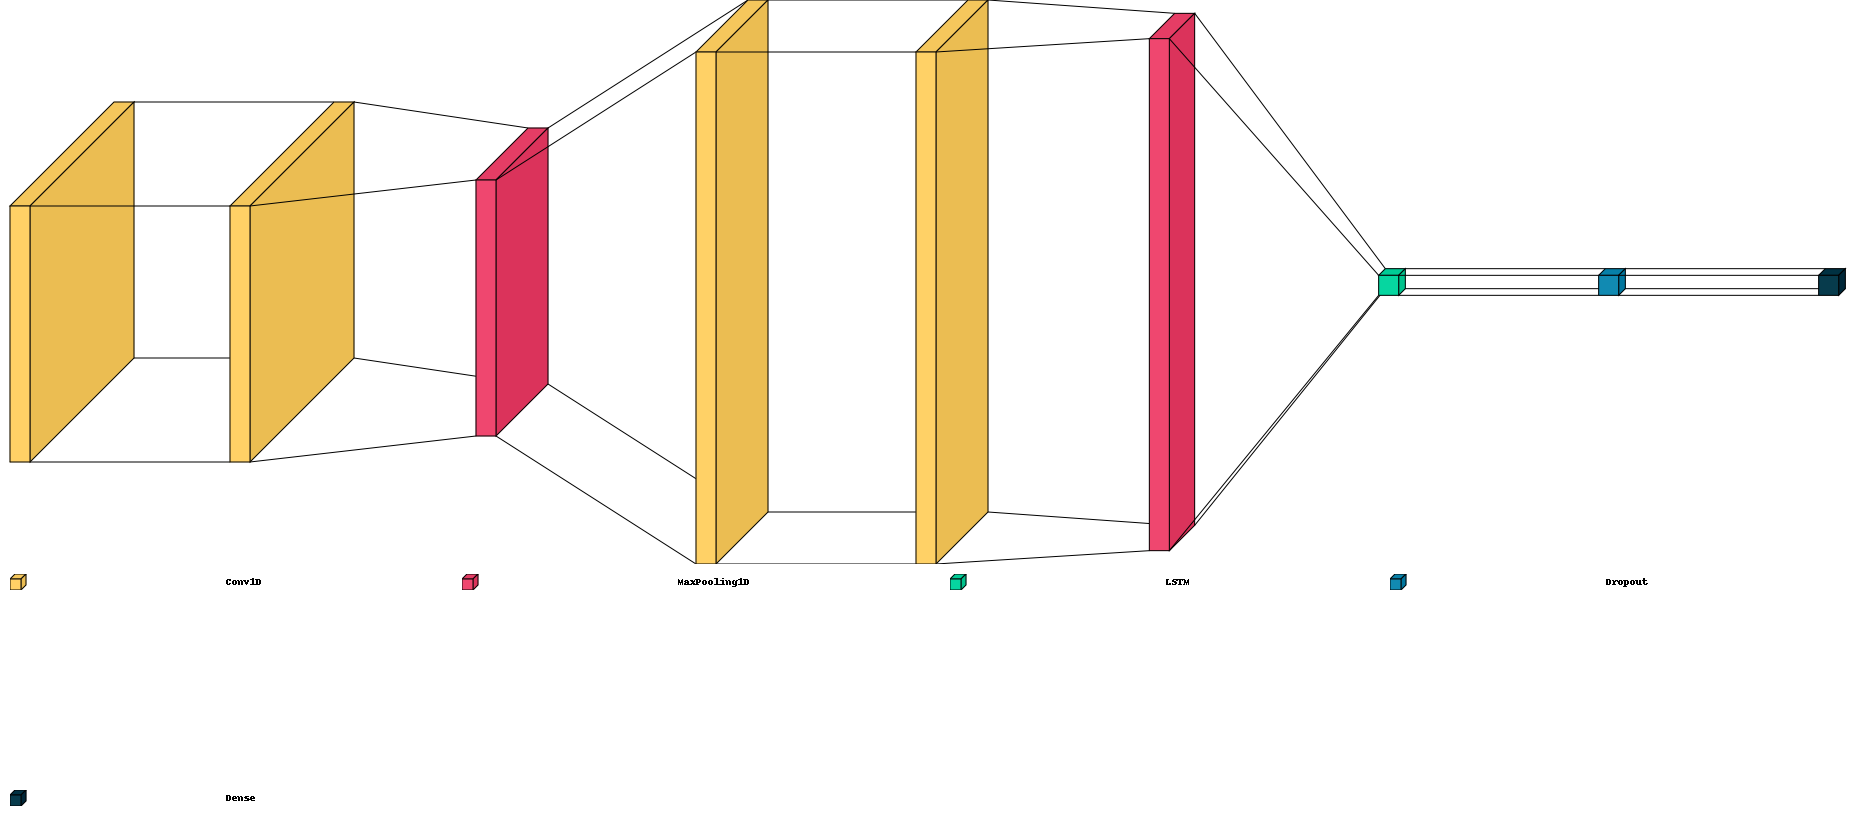

In [28]:
import visualkeras

visualkeras.layered_view(model,legend=True, spacing=200)

In [29]:
# define optimizer and objective, compile cnn
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy']) # se compila la red neuronal con los siguientes parametros:
######
#   PARAMETROS:
#       loss = "categorical_crossentropy" --> esta relacionado con la funcion softmax, se usa para dar una probabilidad sobre unas clases
#       optimizer = "adam" --> Stochastic gradient descent
#       metrics = 'accuracy' --> compara los resultados finales con los reales y de ahi saca las estadisticas
######

# TRAIN

In [30]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="resultados/All/not_sorted/global/no_timestamp/checkpoints/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='accuracy',mode='max')
######
#   ModelCheckpoint se usa para guardar datos o pesos en algun momento de forma que estos puedan ser cargados o examinados en un futuro
#   PARAMETROS:
#       filepath --> direccion donde se va a guardar el archivo
#       verbose = 1 --> para ver una barra de progreso de la operacion
#       save_best_only = True --> se guarda solo si los datos son mejores que los anteriores, en este caso como la metrica de evaluacion de la red es accuracy se mide con eso
#       monitor --> lo que hay que monitorear
#       mode --> segun este parametro se tomara la decision de cuando sobreescribir y cuando no, en este caso como esta indicado max, se sobreescribe cuando el valor de monitor es mayor
######

In [31]:
csv_logger = CSVLogger('resultados/All/not_sorted/global/no_timestamp/modeltrainanalysis15epochs.csv',separator=',', append=False)
######
#   CSVLogger sirve para guardar los datos en un fichero CSV
#   PARAMETROS:
#       filename --> nombre y direccion del archivo
#       separator --> como se separan los resultados en el csv
#       append = false --> con esta opcion se sobreescribe lo que hubiese en el archivo destino, si fuese "True" se concatenaria
######

In [33]:
model.fit(X_train, y_train, epochs=15,callbacks=[checkpointer,csv_logger])
######
#   cnn.fit es la  instruccion con la que se entrena la red neuronal
######
model.save("resultados/cuarto_entrenamiento/DoS/saved_model.hdf5")

Epoch 1/15
2359293/2359293 [==============================] - 1311s 556us/step - loss: 0.0340 - accuracy: 0.9892

Epoch 00001: accuracy improved from -inf to 0.98924, saving model to resultados/cuarto_entrenamiento/DoS/checkpoints/checkpoint-01.hdf5
Epoch 2/15
2359293/2359293 [==============================] - 1309s 555us/step - loss: 0.0149 - accuracy: 0.9951

Epoch 00002: accuracy improved from 0.98924 to 0.99510, saving model to resultados/cuarto_entrenamiento/DoS/checkpoints/checkpoint-02.hdf5
Epoch 3/15
2359293/2359293 [==============================] - 1325s 561us/step - loss: 0.0081 - accuracy: 0.9975

Epoch 00003: accuracy improved from 0.99510 to 0.99750, saving model to resultados/cuarto_entrenamiento/DoS/checkpoints/checkpoint-03.hdf5
Epoch 4/15
2359293/2359293 [==============================] - 1314s 557us/step - loss: 0.0077 - accuracy: 0.9976

Epoch 00004: accuracy improved from 0.99750 to 0.99759, saving model to resultados/cuarto_entrenamiento/DoS/checkpoints/checkpoint

ResourceExhaustedError:  OOM when allocating tensor with shape[244,78,192] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node gradients/conv1d_2/convolution_grad/Conv2DBackpropInput (defined at D:\Program Files\anaconda3\envs\NN\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_2697]

Function call stack:
keras_scratch_graph


# Test

In [32]:
#Cargamos los resultados obtenidos en la etapa de train
model.load_weights("resultados/All/not_sorted/global/no_timestamp/checkpoints/checkpoint-15.hdf5")

#predecimos la naturaleza de los paquetes de test
y_pred = model.predict_classes(X_test)

np.savetxt('resultados/All/not_sorted/global/no_timestamp/expected.txt', y_test1, fmt='%01d')
np.savetxt('resultados/All/not_sorted/global/no_timestamp/predicted.txt', y_pred, fmt='%01d')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.3f%%" % (loss, accuracy*100))

1546762/1546762 [==============================] - 270s 175us/step

Loss: 0.13, Accuracy: 95.791%


## Métricas de evaluación

In [33]:
dataset["Label"].value_counts()

Benign                      4301758
DDOS attack-HOIC             686012
DoS attacks-Hulk             461912
FTP-BruteForce               193360
SSH-Bruteforce               187589
Infilteration                161934
DoS attacks-SlowHTTPTest     139890
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
DDOS attack-LOIC-UDP           1730
Brute Force -Web                249
Brute Force -XSS                 79
SQL Injection                    34
Name: Label, dtype: int64

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred,target_names=Labels, digits=8, zero_division= "warn"))

D:\Program Files\anaconda3\envs\NN\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                  Benign  0.96345179 0.99880854 0.98081163   1075154
        Brute Force -Web  0.90909091 0.33898305 0.49382716        59
        Brute Force -XSS  0.00000000 0.00000000 0.00000000        17
        DDOS attack-HOIC  0.99944571 0.99991828 0.99968194    171310
    DDOS attack-LOIC-UDP  1.00000000 1.00000000 1.00000000       444
   DoS attacks-GoldenEye  0.95041701 0.99453342 0.97197488     10427
        DoS attacks-Hulk  0.99898588 0.99792197 0.99845364    115494
DoS attacks-SlowHTTPTest  0.76484591 0.50178896 0.60600137     35216
   DoS attacks-Slowloris  0.91492190 0.96970764 0.94151847      2839
          FTP-BruteForce  0.70679159 0.88850843 0.78730054     48479
           Infilteration  0.45205479 0.00081635 0.00162975     40424
           SQL Injection  0.00000000 0.00000000 0.00000000         8
          SSH-Bruteforce  0.99974405 0.99959480 0.99966942     46891

                accuracy           

# Representaciones
----
## Matriz de confusión

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, y_pred)

array([[1073873,       2,       0,      85,       0,     465,     104,
             22,     246,     306,      40,       0,      11],
       [     39,      20,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0],
       [     14,       0,       0,       0,       0,       0,       0,
              3,       0,       0,       0,       0,       0],
       [     14,       0,       0,  171296,       0,       0,       0,
              0,       0,       0,       0,       0,       0],
       [      0,       0,       0,       0,     444,       0,       0,
              0,       0,       0,       0,       0,       0],
       [     49,       0,       0,       0,       0,   10370,       8,
              0,       0,       0,       0,       0,       0],
       [    191,       0,       0,       3,       0,      45,  115254,
              0,       0,       0,       0,       0,       1],
       [      0,       0,       0,       0,       0,       0, 

In [36]:
# Normalized confusion matrix
confusion_matrix(y_test1, y_pred, normalize='true')

array([[9.98808543e-01, 1.86019863e-06, 0.00000000e+00, 7.90584419e-05,
        0.00000000e+00, 4.32496182e-04, 9.67303289e-05, 2.04621850e-05,
        2.28804432e-04, 2.84610391e-04, 3.72039726e-05, 0.00000000e+00,
        1.02310925e-05],
       [6.61016949e-01, 3.38983051e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [8.23529412e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.76470588e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [8.17231919e-05, 0.00000000e+00, 0.00000000e+00, 9.99918277e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+

In [37]:
Labels = np.asarray(Labels)

In [38]:
y_test1_text = []
for i in range(0, y_test1.size):
    for j in range(0, Labels.size):
        if y_test1[i] == j:
            y_test1_text.append(Labels[j])

In [39]:
y_pred_text = []
for i in range(0, y_pred.size):
    for j in range(0, Labels.size):
        if y_pred[i] == j:
            y_pred_text.append(Labels[j])

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

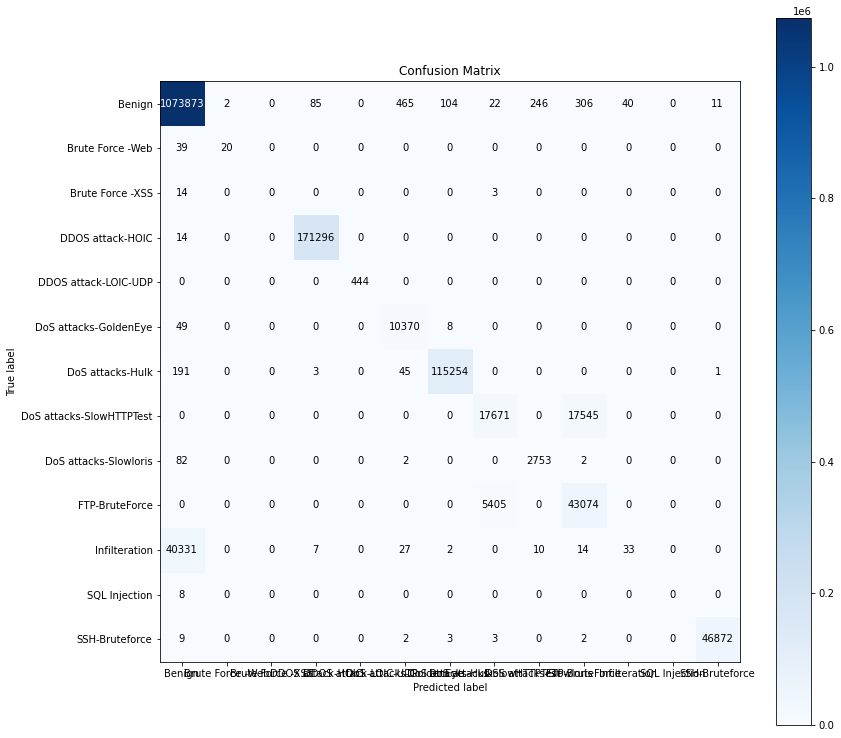

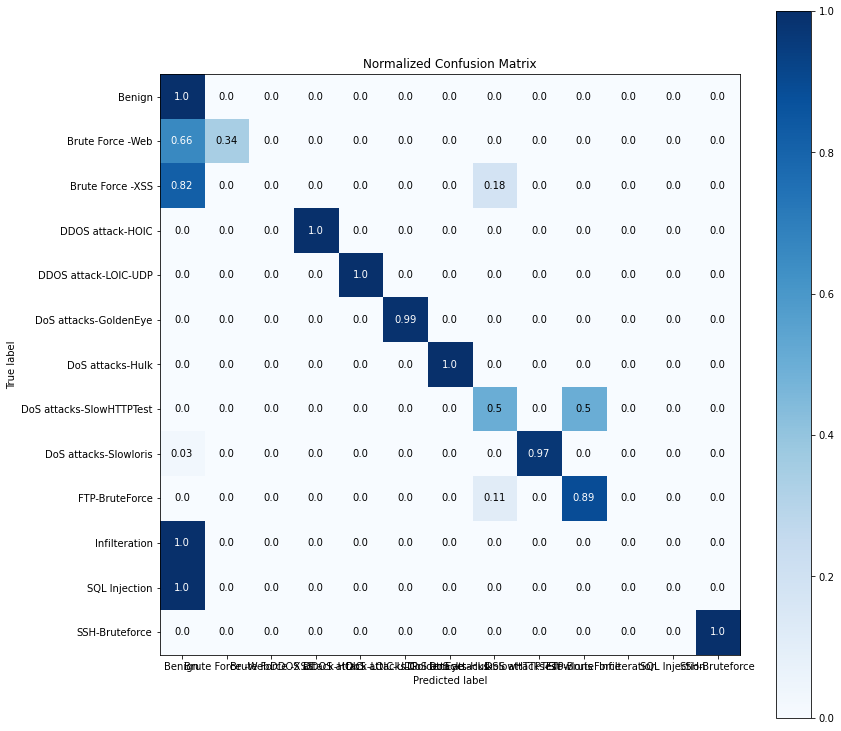

In [40]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, figsize= (13,13))
skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, normalize= True, figsize= (13,13))